# 番外編:一般断面の不定流計算（非定常流計算）+ α

## 不定流計算とは

### 基礎式

 - 一般断面の一次元不定流計算の基礎式は以下となる。(上：質量保存則（連続式）、下：運動量保存則)

$$
\begin{align}
    &\dfrac{\partial A}{\partial t}+\dfrac{\partial Q}{\partial x} = 0 \\
    &\frac{\partial Q}{\partial t} + \frac{\partial }{\partial x}\left( \frac{\beta Q^2}{A}\right)+gA\frac{\partial H}{\partial x}+gAI_e = 0 \\
    &I_e = \dfrac{T}{\rho g A} \\
\end{align}
$$



 - 不定流計算では、$Q,A$の時間変化を計算する。
 - 一般断面の場合、$A \neq B \cdot h $、$H \neq h + z_b $のため、上記のような式形となる。（復習：第2回テキスト）
 - 時間微分項以外は不等流計算と同様。例えば、平均流速公式レベル3の場合は$I_e$の計算方法を変えれば良い。


### 河道内貯留を評価できる

 - 以下のような河道内貯留の効果を計算することができる。
 
増水期と減水期の差
 
![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/05_NonUniformFlow05/ref/loop4.jpg)

椿:水理学演習 下 pp.102

波形の減衰

![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/05_NonUniformFlow05/ref/hydro.png)

椿:水理学演習 下 pp.104

Dynamic wave法（不定流計算）とKinematic wave法の比較

In [1]:
from IPython.display import IFrame
IFrame("https://computational-sediment-hyd.github.io/DynamicwaveVSKinematicwave/fig.html", width=800,height=650)

河道内貯留については以下の書籍が詳しい。

[高橋保：研究者のための洪水の水理 - 被害の評価と対策](https://www.kinokuniya.co.jp/f/dsg-01-9784906431359)

### 河道計画における不定流計算

 - 「河道計画検討の手引き」ではセグメント3河道（背水影響を受ける緩勾配河道）では流下能力評価に不定流計算を用いても良いと記述。
 - 利根川の緩勾配区間などでは不定流計算が用いられている。
 - 計算手法に関するルールは示されていない。

## 数値計算方法

### 不定流計算が難しい（と感じる）理由

 - 不等流計算のように単純な離散化（たとえば、$\dfrac{f_i - f_{i-1}}{\Delta x}$）のみでは計算できない。そのため、「計算スキーム」の理解が必要。
 - 「計算スキーム」は、風上差分、中心差分、QUICK法、WENO法、CIP法、近似リーマン法（HLLCなど）、TVD法、各種陰解法など、無数の手法が提案されている。
 
⇒ 個別のスキームを理解する必要は無い。イメージを掴めばO.K.。

### 一次元不定流の計算方法のイメージ

#### 基本的な計算のイメージ

 - 2点の情報から計算する。風上差分と呼ばれる。
 - 安定的に計算できるが鈍りやすい。実用上問題無い場合も多い。

![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/05_NonUniformFlow05/ref/fig2/s1.PNG)

#### 高(次)精度の計算のイメージ

 - 安定的に計算できる。スキームの工夫が必要。
 - dxを小さくとる必要がある。
 
![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/05_NonUniformFlow05/ref/fig2/s2.PNG)


####  一次元不定流計算で最低限必要な情報

 - 河積（つまり、水位）について、常流では下流の情報が必ず必要（復習：不等流第1回）
 - 安定的に計算できない。
 
![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/05_NonUniformFlow05/ref/fig2/s3.PNG)

#### スタッガードスキーム

 - 流量と河積の定義点を半分ずらす。
 - 安定的に計算できる。

![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/05_NonUniformFlow05/ref/fig2/s4.PNG)




#### 陰解法
 - 陰解法は計算が難しく(復習：オリエンテーション)、鈍りやすいが、安定かつ高速のため汎用ソフトウェアで使用される。
 - 半陰解法は精度を向上できるが、陰解法ほどは安定しない。

![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/05_NonUniformFlow05/ref/fig2/s5.PNG)

### 数値計算方法のまとめ

- 精度と安定性（ロバスト性）はトレードオフの関係にある。
- 目的に応じて計算スキームを選択する。

一次元不定流計算では以下のように考える。

 - できるだけ少ない点の情報を使う。
 ← dxが大きい。計算の安定のため
 - 半陰解法を用いる。
 ← 計算の安定のため
 - 日本の河川は急流のため、常射混在流れでも発散しないものを使うことが望ましい。
 
※ 氾濫解析や流出解析に使用されている計算スキームはロバスト性を重視しており、水面形を求めるには適していない。

### 離散化

 - [水理公式例題プログラム集](https://www.jsce.or.jp/publication/detail/detail.asp?id=1543)に載っている細田先生のプログラム（一次風上+スタッガードスキーム）が安定的で使いやすい。
 - 今回は別の計算スキームを使用する。
     - [Yingによる方法](https://ascelibrary.org/doi/10.1061/%28ASCE%290733-9429%282004%29130%3A10%28977%29)
     ：移流項は一次風上、圧力項+重力項は陰的重み付き中心差分
     - 一般断面の計算に特化した方法

#### 離散式


$$
\begin{align}
&\dfrac{ A^{n+1}_{i} - A^n_i  }{\Delta t} - \dfrac{ Q^{n}_{i} - Q^{n}_{i-1}  }{\Delta x}  = 0 \\
&\dfrac{ Q^{n+1}_{i} - Q^n_i }{\Delta t} 
- \dfrac{1}{\Delta x} \left( \left.\dfrac{\beta Q^2}{A} \right|^n_{i} - \left.\dfrac{\beta Q^2}{A} \right|^n_{i-1} \right) \\
&+ g A^{n+1}_i 
 \left((1-Cr_1) \dfrac{H^{n+1}_{i+1} - H^{n+1}_{i} }{ x_{i+1}-x_{i}} + Cr_2 \dfrac{H^{n+1}_{i} - H^{n+1}_{i-1} }{x_{i}-x_{i-1} } \right)
+ g A^{n}_i {I_e}_i^n \\
\end{align}
$$

$$
\begin{align}
    Cr_1 &= \dfrac{ \Delta t}{x_{i+1}-x_{i}} \dfrac{|U_{i+1}| + |U_{i}|}{2} \\
    Cr_2 &= \dfrac{ \Delta t}{x_{i}-x_{i-1}} \dfrac{|U_{i}| + |U_{i-1}|}{2} \\
    U_i &= \dfrac{Q_i^n}{A_i^n}
\end{align} 
$$

逆流を考慮すると以下となる。


$$
\begin{align}
&\dfrac{ A^{n+1}_{i} - A^n_i  }{\Delta t} - \dfrac{ Q^{n}_{i+j1} - Q^{n}_{i-j2}  }{\Delta x}  = 0 \\
&\dfrac{ Q^{n+1}_{i} - Q^n_i }{\Delta t} 
- \dfrac{1}{\Delta x} \left( \left.\dfrac{\beta Q^2}{A} \right|^n_{i+j1} - \left.\dfrac{\beta Q^2}{A} \right|^n_{i-j2} \right) \\
&+ g A^{n+1}_i 
 \left((1-Cr_1) \dfrac{H^{n+1}_{i+1-j3} - H^{n+1}_{i-j3} }{ x_{i+1-j3}-x_{i-j3}} + Cr_2 \dfrac{H^{n+1}_{i+j3} - H^{n+1}_{i-1+j3} }{x_{i+j3}-x_{i-1+j3} } \right)
+ g A^{n}_i {I_e}_i^n \\
\end{align}
$$

$$
\begin{align}
    Cr_1 &= \dfrac{ \Delta t}{x_{i+1-j3}-x_{i-j3}} \dfrac{|U_{i+1-j3}| + |U_{i-j3}|}{2} \\
    Cr_2 &= \dfrac{ \Delta t}{x_{i+j3}-x_{i-1+j3}} \dfrac{|U_{i+j3}| + |U_{i-1+j3}|}{2} \\
    U_i &= \dfrac{Q_i^n}{A_i^n}
\end{align} 
$$

$$
\begin{align}
j1 &= 
\left\{ \begin{array}{ll}
    0 &\!\!\!     ({\rm if} \  Q_i \geq 0 \ \& \ Q_{i+1} \geq 0) \\
    1 &\!\!\! ({\rm if} \  Q_i \leq 0 \ \& \ Q_{i+1} \leq 0) \\
    1/2 &\!\!\! ({\rm otherwise})
\end{array} \right. \\
j2 &= 
\left\{ \begin{array}{ll}
    1 &\!\!\!     ({\rm if} \  Q_i \geq 0 \ \& \ Q_{i-1} \geq 0) \\
    0 &\!\!\! ({\rm if} \  Q_i \leq 0 \ \& \ Q_{i-1} \leq 0) \\
    1/2 &\!\!\! ({\rm otherwise})
\end{array} \right. \\
j3 &= 
\left\{ \begin{array}{ll}
    0 &\!\!\! ({\rm if} \ Q_i \geq 0 \ \& \ Q_{i+1} \geq 0 \ \& \ Q_{i-1} \geq 0 ) \\
    1 &\!\!\! ({\rm if} \ Q_i \leq 0 \ \& \ Q_{i+1} \leq 0 \ \& \ Q_{i-1} \leq 0) \\
    1/2 &\!\!\! ({\rm otherwise})
\end{array} \right. 
\end{align}
$$

### プログラミング

#### 擬似コード

In [2]:
# 初期条件の設定

for t in time: # 時間発展のループ
    
    # 上流端流量の更新
    # 下流端水位の更新
    
    for s in sections:
        # 連続式によるAの更新
    
    for s in sections:
        # 更新したAによるHの更新
    
    for s in sections:
        # 運動方程式によるQの更新
    

IndentationError: expected an indented block (<ipython-input-2-4e5122775df7>, line 11)

#### ソースコード

 - クラス等は外部ファイルに

In [3]:
import numpy as np
import classRiverSection as sect
import class1Dmodel as model

 - 前回の課題の断面セット
     - 2～4km, 12～14kmのみ樹木を設定
 
 ※本来は分割断面も削除する必要がありますが面倒なので境界混合係数のみを変更

In [4]:
x=np.array( [0,5,63,93,100,200,206,230,260,294,300] , dtype=float)
y=np.array( [6, 3.5, 3.5, 3.5,  0,  0,  3, 3, 3, 3,  6] , dtype=float)
n=np.array([0.041, 0.041, 0.05, 0.030,0.030,0.030,0.040,0.05,0.040,0.040], dtype=float)

X = [x[0:3], x[2:4], x[3:7], x[6:8], x[7:9], x[8:]]
Y = [y[0:3], y[2:4], y[3:7], y[6:8], y[7:9], y[8:]]
N = [n[0:2], n[2:3], n[3:6], n[6:7], n[7:8], n[8:]]

withTree = {
'treeh' : np.array([0, 1.5, 0, 0, 3.5, 0], dtype=float) # 樹高：分割断面数
,'subsectBoundf' : np.array([0, 0.1, 0.1, 0, 0.1, 0.1, 0], dtype=float) # 流れと樹木群の境界混合係数：分割断面数+1
,'subsectBoundfd' : np.array([0, 0.17, 0.17, 0.17, 0.17, 0.17, 0], dtype=float) # 流れ間の境界混合係数：分割断面数+1
    }

withoutTree = {
'treeh' : np.array([0, 0, 0, 0, 0, 0], dtype=float) # 樹高：分割断面数
,'subsectBoundf' : np.array([0, 0, 0, 0, 0, 0, 0], dtype=float) # 流れと樹木群の境界混合係数：分割断面数+1
,'subsectBoundfd' : np.array([0, 0, 0.17, 0.17, 0, 0, 0], dtype=float) # 流れ間の境界混合係数：分割断面数+1
    }

dx = 200
Ls = np.arange(0,15001,dx) 

csections = []
s = sect.section(X, Y, N, Ls[0], **withoutTree)
csections.append(s)

yold = y.copy()
ibs = []
ibs.append(1/2000)
for L in Ls[1:]:
    if L < 5000:
        ib = 1/2000
    elif L < 10000:
        ib = 1/1000
    else:
        ib = 1/500
        
    y = yold + dx*ib
    Y = [y[0:3], y[2:4], y[3:7], y[6:8], y[7:9], y[8:]]
    
    if 2000 <= L < 4000:
        s = sect.section(X, Y, N, L, **withTree)
    elif 12000 <= L < 14000:
        s = sect.section(X, Y, N, L, **withTree)
    else:
        s = sect.section(X, Y, N, L, **withoutTree)
    
    csections.append(s)
    
    yold = y.copy()
    ibs.append(ib)

 - 不定流計算モデル

In [5]:
def UnSteadyflow(sections, Q, H, A, Qbound, Hbound, dt):
    g = float(9.8)
    imax = len(Q)
    Anew, Qnew, Hnew = np.zeros(imax), np.zeros(imax), np.zeros(imax)
    ie = np.zeros(imax)
    Beta = np.zeros(imax)
    
# continuous equation
    for i in range(1, imax-1) : 
        dx = 0.5*(sections[i-1].distance - sections[i+1].distance)
        Anew[i] = A[i] - dt * ( Q[i] - Q[i-1] ) / dx
        
    s = sections[imax-1]
    Ad,_,_,_,_ = s.H2ABSKRc(Hbound)
    Anew[imax-1] = Ad
    Anew[0] = Anew[1]
#     Anew[0] = (Anew[1] - A[1]) + A[0]
    
    for i in range(imax) : 
        s = sections[i]
        Hnew[i] = s.A2H(Anew[i])
        ie[i], _, Beta[i], _= s.HQ2IeAlphaBetaVsub(H[i], Q[i])        
    
# moumentum equation
    for i in range(1, imax-1): 
        ic, im, ip = i, i-1, i+1
        dxp = sections[ic].distance - sections[ip].distance
        dxm = sections[im].distance - sections[ic].distance
        dxc = 0.5*(sections[im].distance - sections[ip].distance)
        
        Cr1 = 0.5*( Q[ic]/A[ic] + Q[ip]/A[ip] )*dt/dxp
        Cr2 = 0.5*( Q[ic]/A[ic] + Q[im]/A[im] )*dt/dxm
        dHdx1 = ( Hnew[ip] - Hnew[ic] ) / dxp
        dHdx2 = ( Hnew[ic] - Hnew[im] ) / dxm
        dHdx = (float(1.0) - Cr1) * dHdx1 + Cr2 * dHdx2
        
        Qnew[ic] = Q[ic] - dt * ( Beta[ic]*Q[ic]**2/A[ic] - Beta[im]*Q[im]**2/A[im] ) / dxc \
                         - dt * g * Anew[ic] * dHdx \
                         - dt * g * A[ic] * ie[ic] 
        
    Qnew[imax-1] = Qnew[imax-2]
    Qnew[0] = Qbound
        
    return Qnew, Hnew, Anew

 - 上流端流量波形を[ガンマ関数](https://ja.wikipedia.org/wiki/%E3%82%AC%E3%83%B3%E3%83%9E%E9%96%A2%E6%95%B0)で与える 

$$
\begin{align}
    \Gamma \left( z\right) =\int _{0}^{\infty }t^{z-1}e^{-t}dt
\end{align}
$$

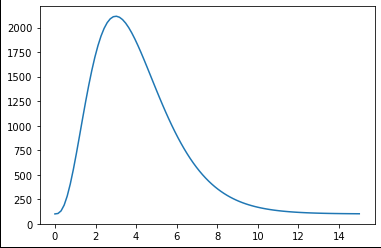

In [6]:
import matplotlib.pyplot as plt

gamma = lambda t,z : t**(z-1)*np.exp(-t)

L = np.linspace(0,15,100)
Qupt = 1500*gamma(L,4)+100

plt.figure(facecolor="white", edgecolor="black", linewidth=2)
plt.plot(L,Qupt)
plt.show()

 - 計算時間間隔で補間

In [7]:
dt = float(10)
t = np.arange(0,15*3600,dt)
Qupts = np.interp(t, L*3600, Qupt)

 - 初期条件を設定:不等流計算で求める

In [8]:
Qup = Qupts[0]
ib = float(1/2000)
# 下流端水位
s = csections[0]
Hd = s.H0(Qup, ib)
H = model.nonuniform(csections, Qup, Hd)

A = np.zeros_like(H)
for i, s in enumerate(csections):
    A[i],_,_,_,_ = s.H2ABSKRc(H[i])

 - 不定流計算
     - 下流⇒上流から上流⇒下流に並びかえて計算する
     - 結果はすべて配列に保存

In [9]:
%%time
rcsections = list(reversed(csections))

Qc  = np.full_like(H,Qup)
Hc = H[::-1]
Ac = A[::-1]

Qout = np.zeros((len(Qupts), len(Qc)))
Hout = np.zeros_like(Qout)

Qout[0] = Qc
Hout[0] = Hc

for n in range(1, len(Qupts)):
    s = rcsections[-1]
    Hd = s.H0(Qc[-1], ib)
    Qc, Hc, Ac = UnSteadyflow(rcsections, Qc, Hc, Ac, Qupts[n], Hd, dt)

    Qout[n] = Qc
    Hout[n] = Hc

Wall time: 4min 15s


 - 流量波形の計算結果

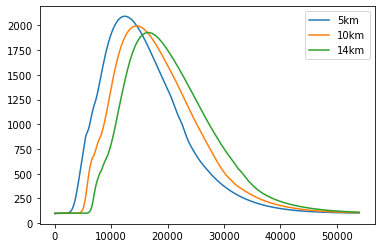

In [10]:
import matplotlib.pyplot as plt

plt.plot(t,Qout[:,25], label='5km')
plt.plot(t,Qout[:,50], label='10km')
plt.plot(t,Qout[:,70], label='14km')
plt.legend()
plt.show()

 - 流量ループ

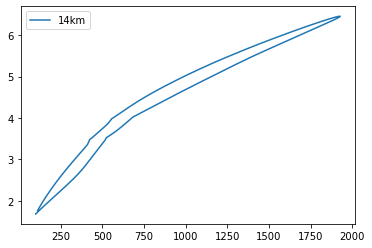

In [11]:
plt.plot(Qout[:,70], Hout[:,70], label='14km')
plt.legend()
plt.show()

### 高速化

上記のような逐次計算を行う場合、計算時間が気になってくる。そこで、Numbaによる高速化を実施する。

#### Numbaとは

Numbaは、Pythonのジャストインタイム（JIT）コンパイラであり、数値計算の高速化を目的としています。Numbaを使用すると、Pythonコードを効率的な機械語に変換し、CPUやGPUを最大限に活用して計算を実行できます。

Numbaは、デコレータや関数呼び出しを使用してPython関数にアノテーションを追加することで機能します。アノテーションにより、Numbaは関数の実行を高速化するために最適なコンパイル戦略を選択し、関数を機械語にコンパイルします。Numbaは、NumPyの多次元配列や科学計算ライブラリとの統合も提供しており、高速な数値計算が可能です。

Numbaは特に、ループ処理が多い数値計算や科学技術計算のタスクに適しています。また、GPUを使用して並列計算を行うこともできます。Numbaは、NumPyスタイルのコードに対しても簡単に適用できるため、既存のコードを最適化するのに便利です。

Numbaは関数をコンパイルし、実行時に高速な機械語コードを生成します。

Numbaは、Pythonの標準のCPythonインタープリタとも連携するため、既存のPythonコードベースに容易に統合できます。ただし、すべてのPythonコードに対してNumbaを適用する必要はありません。Numbaは、数値計算がボトルネックとなっている部分や、パフォーマンスが重要なコード領域に対して選択的に使用することが推奨されます。

#### コーディング例

 - 関数は数行付け足すだけ。

In [3]:
from numba import jit 

@jit(nopython=True, parallel=False)
def matrixsolver(a,b,c,d):
    a = 0

SyntaxError: unexpected EOF while parsing (<ipython-input-3-88acb19d0b6b>, line 5)

 - クラスはメンバ変数の型を定義

In [4]:
from numba.experimental import jitclass
from numba import float64  
from numba import types

spec = [
    ('distance'  , float64)
    ,('_subsections',types.List(subsection.class_type.instance_type, reflected=True))
    ,('_subsectBounds',types.List(subsectBound.class_type.instance_type, reflected=True))
]
@jitclass(spec)
class section(object):
    def __init__(self, X, Y, N, distance=np.nan, treeh=np.nan, subsectBoundf=np.nan, subsectBoundfd=np.nan):
        self._subsections = [subsection(x,y,n,h) for x,y,n,h in zip(X,Y,N,treeh)]
        self._subsectBounds = [subsectBound(f, fd) for f, fd in zip(subsectBoundf, subsectBoundfd)]
        self.distance = distance

NameError: name 'subsection' is not defined

#### 計算時間

上記の処理のみで約30倍高速化される。
多次元の計算では数百倍になることもある。

 - オリジナル
 > CPU times: user 8min 22s, sys: 7.28 s, total: 8min 30s
 > Wall time: 8min 34s
    
 - Numba
 > CPU times: user 13.8 s, sys: 67.6 ms, total: 13.9 s
 > Wall time: 15 s

## 実河川の計算
    間に合いませんでした。。。

# おわりに：不等流編

 - Pythonで平均流速公式レベル3の不等流計算、不定流計算モデルのコーディングを行った。
    - 微修正を行えば汎用化可能。
    - I/Oの見直しなどヘビーユーザーと一緒にやってはどうでしょうか。
 - コアメンバーの習得度は5～7割程度。
    - あとは復習 + 実務
    - ぜひ、既存知見の習得に留まらず、その先に進んで欲しい。
 - 不明な点があれば気軽にご相談下さい。

# 資料の取り扱い

勉強会資料はすべてGitHubに上げています。（誤字等再整理しておきます。）

 - 再配布O.K.：社内外誰に配ってもらっても大丈夫です。
 - コピペO.K.：ご自由に使って下さい。参照している文献等は引用元を記載して下さい。
 - 作成者の記載、公表N.G.：私が作成した資料であることは基本的には言わないで下さい。